In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('gurgaon_properties_v4.csv')

In [4]:
df.shape

(3494, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independant,sector 41,7.25,29293.0,9.0,8.0,3,4.0,Old Property,2475.000000,0.0,1.0,0.0,0.0,0.0,0.0,94.0
1,flat,vipul lavanya,sector 81,1.28,7174.0,3.0,3.0,3,1.0,Moderately Old,1605.600000,0.0,1.0,0.0,1.0,0.0,0.0,49.0
2,flat,m3m woodshire,sector 107,1.40,5929.0,3.0,4.0,N,1.0,New Property,2129.768041,0.0,0.0,0.0,0.0,0.0,0.0,67.0
3,flat,ild greens,sector 37,0.78,5714.0,2.0,2.0,3,1.0,Moderately Old,1068.100000,0.0,0.0,0.0,0.0,0.0,0.0,103.0
4,flat,ashiana mulberry,sohna road,1.05,5412.0,2.0,2.0,3,1.0,New Property,1175.970000,1.0,0.0,0.0,0.0,0.0,1.0,49.0


In [6]:
df.rename(columns={'bedRoom': 'bedroom'}, inplace=True)

In [7]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [8]:
numeric_df = train_df.select_dtypes(include='number')
numeric_df.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
bathroom,0.611932
bedroom,0.597379
servant room,0.393734
built_up_area,0.361795
pooja room,0.316643
store room,0.306737
study room,0.234254
luxury_score,0.098111
others,-0.013833


In [9]:
train_df.shape

(3494, 16)

In [10]:
train_df.head()

,property_type,sector,price,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 41,7.25,9.0,8.0,3,4.0,Old Property,2475.000000,0.0,1.0,0.0,0.0,0.0,0.0,94.0
1,flat,sector 81,1.28,3.0,3.0,3,1.0,Moderately Old,1605.600000,0.0,1.0,0.0,1.0,0.0,0.0,49.0
2,flat,sector 107,1.40,3.0,4.0,N,1.0,New Property,2129.768041,0.0,0.0,0.0,0.0,0.0,0.0,67.0
3,flat,sector 37,0.78,2.0,2.0,3,1.0,Moderately Old,1068.100000,0.0,0.0,0.0,0.0,0.0,0.0,103.0
4,flat,sohna road,1.05,2.0,2.0,3,1.0,New Property,1175.970000,1.0,0.0,0.0,0.0,0.0,1.0,49.0


**luxury_score**

<Axes: xlabel='luxury_score'>

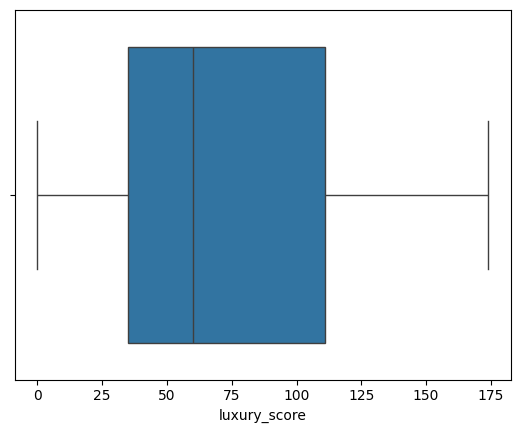

In [11]:
sns.boxplot(x='luxury_score',data=df)

In [12]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [13]:
train_df['luxury_category']=train_df['luxury_score'].apply(categorize_luxury)

In [14]:
train_df.head()

,property_type,sector,price,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 41,7.25,9.0,8.0,3,4.0,Old Property,2475.000000,0.0,1.0,0.0,0.0,0.0,0.0,94.0,Medium
1,flat,sector 81,1.28,3.0,3.0,3,1.0,Moderately Old,1605.600000,0.0,1.0,0.0,1.0,0.0,0.0,49.0,Low
2,flat,sector 107,1.40,3.0,4.0,N,1.0,New Property,2129.768041,0.0,0.0,0.0,0.0,0.0,0.0,67.0,Medium
3,flat,sector 37,0.78,2.0,2.0,3,1.0,Moderately Old,1068.100000,0.0,0.0,0.0,0.0,0.0,0.0,103.0,Medium
4,flat,sohna road,1.05,2.0,2.0,3,1.0,New Property,1175.970000,1.0,0.0,0.0,0.0,0.0,1.0,49.0,Low


**floorNum**

<Axes: xlabel='floorNum'>

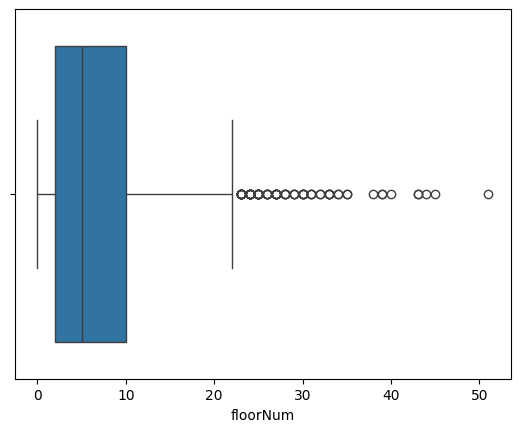

In [15]:
sns.boxplot(x='floorNum',data=df)

In [16]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [17]:
train_df['floor_category']=train_df['floorNum'].apply(categorize_floor)

In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [19]:
train_df.head()

,property_type,sector,price,bedroom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 41,7.25,9.0,8.0,3,Old Property,2475.000000,0.0,1.0,0.0,0.0,0.0,0.0,Medium,Mid Floor
1,flat,sector 81,1.28,3.0,3.0,3,Moderately Old,1605.600000,0.0,1.0,0.0,1.0,0.0,0.0,Low,Low Floor
2,flat,sector 107,1.40,3.0,4.0,N,New Property,2129.768041,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low Floor
3,flat,sector 37,0.78,2.0,2.0,3,Moderately Old,1068.100000,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low Floor
4,flat,sohna road,1.05,2.0,2.0,3,New Property,1175.970000,1.0,0.0,0.0,0.0,0.0,1.0,Low,Low Floor


In [20]:
train_df.shape

(3494, 16)

In [21]:
#before feature selection we must change categorical string value to numeric value
from sklearn.preprocessing import OrdinalEncoder
#create a copy of the original data for label encoding
data=train_df.copy()
categorical_columns=data.select_dtypes(include='object').columns
encoder=OrdinalEncoder()
data[categorical_columns]=encoder.fit_transform(data[categorical_columns])

In [22]:
print(encoder.categories_)

[array(['flat', 'house'], dtype=object), array(['new', 'new sector 2', 'sector 1', 'sector 10', 'sector 102',
       'sector 103', 'sector 104', 'sector 105', 'sector 106',
       'sector 107', 'sector 108', 'sector 109', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 17', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 28', 'sector 3', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 37', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 'sector 63',
       'sector 65', 'sector 66', 'sector 67', 'sector 68', 

In [23]:
data.head()

,property_type,sector,price,bedroom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,39.0,7.25,9.0,8.0,3.0,2.0,2475.000000,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
1,0.0,78.0,1.28,3.0,3.0,3.0,0.0,1605.600000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,9.0,1.40,3.0,4.0,5.0,1.0,2129.768041,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3,0.0,34.0,0.78,2.0,2.0,3.0,0.0,1068.100000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,93.0,1.05,2.0,2.0,3.0,1.0,1175.970000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [24]:
x=data.drop(columns=['price'])
y=data['price']

# **Feature Selection**

**1.Correlation Analysis**

<Axes: >

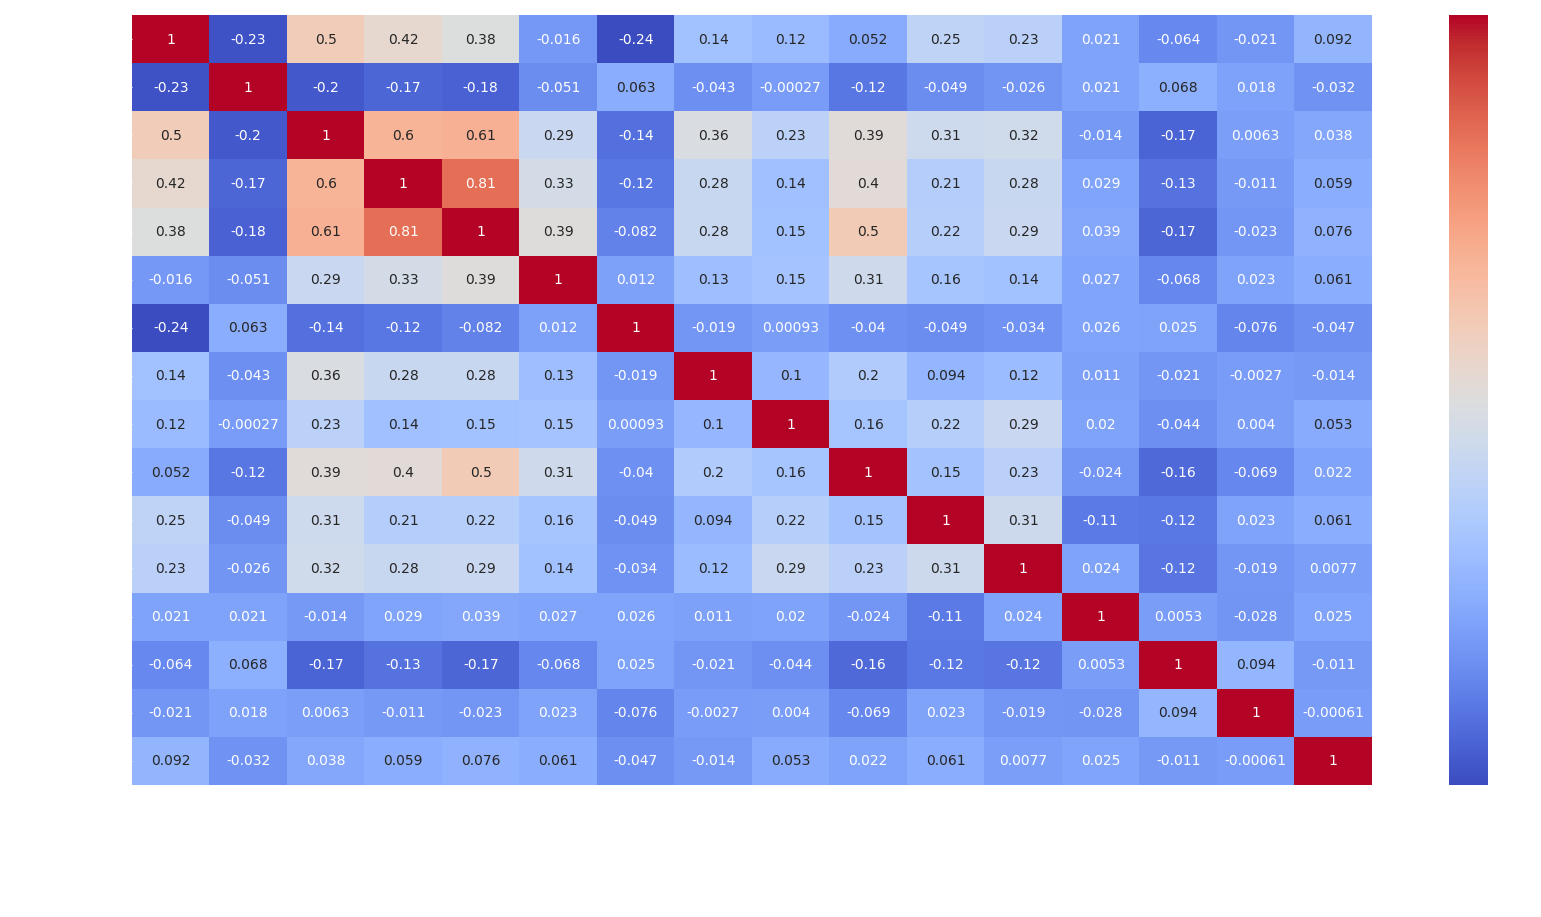

In [25]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


In [26]:
df1 = data.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
df1

,feature,corr_coeff
0,sector,-0.204127
1,price,1.000000
2,bedroom,0.597379
3,bathroom,0.611932
4,balcony,0.291093
5,agePossession,-0.138470
6,built_up_area,0.361795
7,study room,0.234254
8,servant room,0.393734
9,store room,0.306737


**2.Random Forest Feature Importance**

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x, y)

RandomForestRegressor(random_state=42)

In [28]:
# Extract feature importance scores for label encoded data
df2 = pd.DataFrame({
    'feature': x.columns,
    'rf_importance': rf_model.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

df2

,feature,rf_importance
6,built_up_area,0.647857
1,sector,0.107210
0,property_type,0.105488
3,bathroom,0.025122
2,bedroom,0.023528
8,servant room,0.022007
5,agePossession,0.014608
4,balcony,0.010281
7,study room,0.008785
10,pooja room,0.008167


**3.Gradient Boosting Feature Importance**

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_model.fit(x,y)

GradientBoostingRegressor(random_state=42)

In [30]:
df3=pd.DataFrame({
    'feature':x.columns,
    'gb_importance':gb_model.feature_importances_
}).sort_values(by='gb_importance',ascending=False)


In [31]:
df3

,feature,gb_importance
6,built_up_area,0.688013
1,sector,0.102230
0,property_type,0.091317
2,bedroom,0.039458
3,bathroom,0.034060
8,servant room,0.021580
7,study room,0.008185
4,balcony,0.004771
12,furnishing_type,0.003425
5,agePossession,0.003268


**4.Permutation Importance**

In [32]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#train a random forest regressor on label encoded data
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [34]:
#calculate permutation importance
result=permutation_importance(rf_model,x_test,y_test,n_repeats=10,random_state=42)

df4=pd.DataFrame({
    'feature':x.columns,
    'permutation_importance':result.importances_mean
}).sort_values(by='permutation_importance',ascending=False)

In [35]:
df4

,feature,permutation_importance
6,built_up_area,0.687214
0,property_type,0.168731
1,sector,0.137218
2,bedroom,0.038102
3,bathroom,0.029923
8,servant room,0.023656
5,agePossession,0.005695
13,luxury_category,0.005270
12,furnishing_type,0.002250
4,balcony,0.001082


**5.LASSO Regression**

In [36]:
#for ordinal encoding linear models are not that reliable still we are using some

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [38]:
#standardize the features
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [39]:
lasso=Lasso(alpha=0.01,random_state=42)
lasso.fit(x_scaled,y)

Lasso(alpha=0.01, random_state=42)

In [40]:
df5=pd.DataFrame({
    'feature':x.columns,
    'lasso_coef':lasso.coef_
}).sort_values(by='lasso_coef',ascending=False)
df5

,feature,lasso_coef
0,property_type,0.769826
3,bathroom,0.536923
6,built_up_area,0.456285
2,bedroom,0.397110
8,servant room,0.322577
4,balcony,0.211172
9,store room,0.208146
7,study room,0.200713
10,pooja room,0.110078
13,luxury_category,0.066329


**6.Recursive Feature Elimination**

In [41]:
#one of the best feature selection techniques
from sklearn.feature_selection import RFE

#initialise the best estimator
estimator=RandomForestRegressor()

#apply RFE on the label encoded and standardised the training data
rfe=RFE(estimator,n_features_to_select=x.shape[1],step=1)
rfe=rfe.fit(x,y)

In [42]:
selected_features=x.columns[rfe.support_]

In [43]:
#extract the coefficients for the selected features from the underlying regression model
selected_coefficients=rfe.estimator_.feature_importances_

In [44]:
# Organize the results into a DataFrame
df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

df6

,feature,rfe_score
6,built_up_area,0.641496
1,sector,0.113145
0,property_type,0.106629
3,bathroom,0.026566
2,bedroom,0.023763
8,servant room,0.022340
5,agePossession,0.014222
4,balcony,0.010215
7,study room,0.008729
13,luxury_category,0.006945


In [45]:
result=df1.merge(df2,on='feature').merge(df3,on='feature').merge(df4,on='feature').merge(df6,on='feature').set_index('feature')
# not taking lasso into the consideration
result

,corr_coeff,rf_importance,gb_importance,permutation_importance,rfe_score
feature,,,,,
sector,-0.204127,0.107210,0.102230,0.137218,0.113145
bedroom,0.597379,0.023528,0.039458,0.038102,0.023763
bathroom,0.611932,0.025122,0.034060,0.029923,0.026566
balcony,0.291093,0.010281,0.004771,0.001082,0.010215
agePossession,-0.138470,0.014608,0.003268,0.005695,0.014222
built_up_area,0.361795,0.647857,0.688013,0.687214,0.641496
study room,0.234254,0.008785,0.008185,0.000180,0.008729
servant room,0.393734,0.022007,0.021580,0.023656,0.022340
store room,0.306737,0.005736,0.003020,-0.000940,0.004392


In [46]:
result=result.divide(result.sum(axis=0),axis=1)

In [47]:
result

,corr_coeff,rf_importance,gb_importance,permutation_importance,rfe_score
feature,,,,,
sector,-0.077690,0.119853,0.112503,0.147699,0.126649
bedroom,0.227359,0.026303,0.043423,0.041012,0.026599
bathroom,0.232898,0.028085,0.037483,0.032209,0.029736
balcony,0.110788,0.011494,0.005250,0.001164,0.011434
agePossession,-0.052701,0.016330,0.003596,0.006130,0.015919
built_up_area,0.137697,0.724257,0.757154,0.739705,0.718062
study room,0.089156,0.009821,0.009008,0.000194,0.009771
servant room,0.149853,0.024602,0.023748,0.025463,0.025006
store room,0.116743,0.006412,0.003323,-0.001011,0.004916


In [48]:
result[['corr_coeff',	'rf_importance',	'gb_importance',	'permutation_importance',	'rfe_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.615375
sector,0.085803
bedroom,0.072939
bathroom,0.072082
servant room,0.049735
balcony,0.028026
pooja room,0.027317
store room,0.026077
study room,0.023590


In [49]:
export_df=train_df.drop(columns=['pooja room','study room','others'])
export_df['price']=y

In [50]:
export_df.head()

,property_type,sector,price,bedroom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,house,sector 41,7.25,9.0,8.0,3,Old Property,2475.000000,1.0,0.0,0.0,Medium,Mid Floor
1,flat,sector 81,1.28,3.0,3.0,3,Moderately Old,1605.600000,1.0,0.0,0.0,Low,Low Floor
2,flat,sector 107,1.40,3.0,4.0,N,New Property,2129.768041,0.0,0.0,0.0,Medium,Low Floor
3,flat,sector 37,0.78,2.0,2.0,3,Moderately Old,1068.100000,0.0,0.0,0.0,Medium,Low Floor
4,flat,sohna road,1.05,2.0,2.0,3,New Property,1175.970000,0.0,0.0,1.0,Low,Low Floor


In [51]:
export_df.to_csv('gurgaon_properties_v5.csv', index=False)